In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [4]:
df.shape

(53392, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

In [7]:
df.shape

(53392, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(49183, 10)

In [11]:
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1


In [12]:
df.isna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
53382,False,False,False,False,False,True,True,False,True,False
53383,False,False,False,False,False,True,True,False,True,False
53384,False,False,False,False,False,True,True,True,False,False
53385,False,False,False,False,False,True,True,True,False,False


In [13]:
missing = df.isnull().sum() * 100 / len(df)
missing

YearStart          0.000000
LocationAbbr       0.000000
LocationDesc       0.000000
Data_Value         1.758738
Sample_Size        1.758738
Age(years)        76.748063
Education         84.506842
Income            72.870707
Race/Ethnicity    77.502389
LocationID         0.000000
dtype: float64

In [14]:
df = df.drop(['Age(years)'],axis=1)

In [15]:
df

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Education,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,High school graduate,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,"$75,000 or greater",NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,NaN,Data not reported,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,NaN,Non-Hispanic White,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,NaN,Non-Hispanic Black,78


In [16]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [17]:
remove_outliers(df)
df

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Education,Income,Race/Ethnicity,LocationID
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,Some college or technical school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,"$75,000 or greater",NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,NaN,Data not reported,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,NaN,Non-Hispanic White,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,NaN,Non-Hispanic Black,78


In [18]:
df.dtypes

YearStart           int64
LocationAbbr       object
LocationDesc       object
Data_Value        float64
Sample_Size       float64
Education          object
Income             object
Race/Ethnicity     object
LocationID          int64
dtype: object

In [19]:
numerical_col = df.select_dtypes(include=['int64', 'float']).columns
numerical = df[numerical_col]
numerical

,YearStart,Data_Value,Sample_Size,LocationID
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53382,2016,13.3,212.0,78
53383,2016,25.3,137.0,78
53384,2016,18.3,154.0,78
53385,2016,24.1,820.0,78


In [20]:
numerical = numerical.fillna(numerical.mean())
numerical

,YearStart,Data_Value,Sample_Size,LocationID
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53382,2016,13.3,212.0,78
53383,2016,25.3,137.0,78
53384,2016,18.3,154.0,78
53385,2016,24.1,820.0,78


In [21]:
numerical.isna().sum()

YearStart      0
Data_Value     0
Sample_Size    0
LocationID     0
dtype: int64

In [22]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical = df[categorical_col]
categorical

,LocationAbbr,LocationDesc,Education,Income,Race/Ethnicity
1,AL,Alabama,NaN,NaN,NaN
2,AL,Alabama,NaN,NaN,NaN
3,AL,Alabama,Less than high school,NaN,NaN
4,AL,Alabama,High school graduate,NaN,NaN
5,AL,Alabama,Some college or technical school,NaN,NaN
...,...,...,...,...,...
53382,VI,Virgin Islands,NaN,"$75,000 or greater",NaN
53383,VI,Virgin Islands,NaN,Data not reported,NaN
53384,VI,Virgin Islands,NaN,NaN,Non-Hispanic White
53385,VI,Virgin Islands,NaN,NaN,Non-Hispanic Black


In [23]:
categorical.columns

Index(['LocationAbbr', 'LocationDesc', 'Education', 'Income',
       'Race/Ethnicity'],
      dtype='object')

In [26]:
income_map = {'less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4, 
          '$75,000 or greater':5, 'data not reported':6}
income_map
df['Income'] = df['Income'].map(income_map)

In [27]:
education_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
education_map
df['Education'] = df['Education'].map(education_map)

In [29]:
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['Race/Ethnicity'] = df['Race/Ethnicity'].map(rc_map)

In [30]:
df

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Education,Income,Race/Ethnicity,LocationID
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,NaN,NaN,1
5,2011,AL,Alabama,33.8,1925.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,5.0,NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,NaN,NaN,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,NaN,NaN,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,NaN,NaN,78


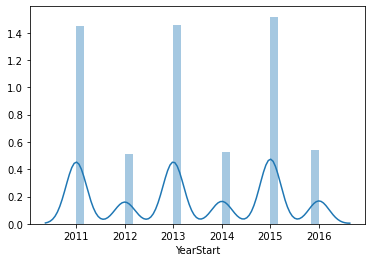

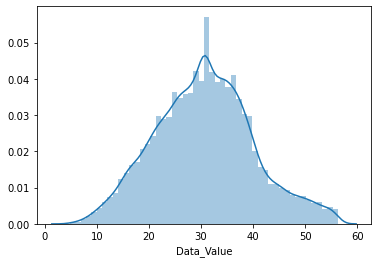

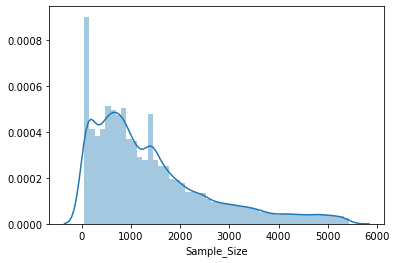

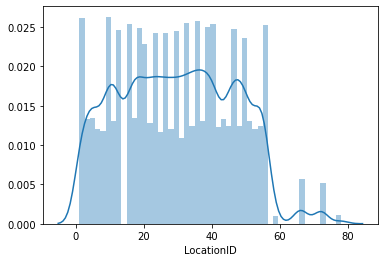

In [35]:
for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

In [36]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43666 entries, 1 to 53386
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearStart    43666 non-null  int64  
 1   Data_Value   43666 non-null  float64
 2   Sample_Size  43666 non-null  float64
 3   LocationID   43666 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.7 MB


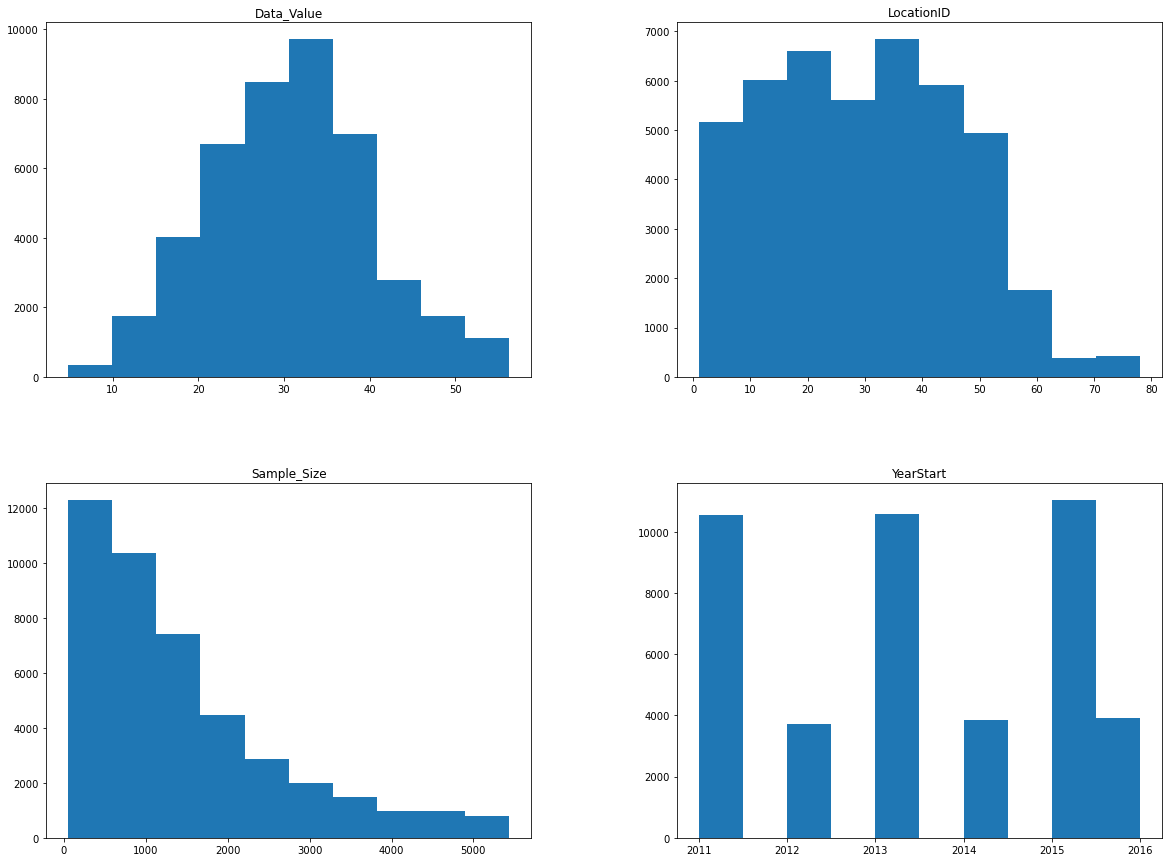

In [39]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

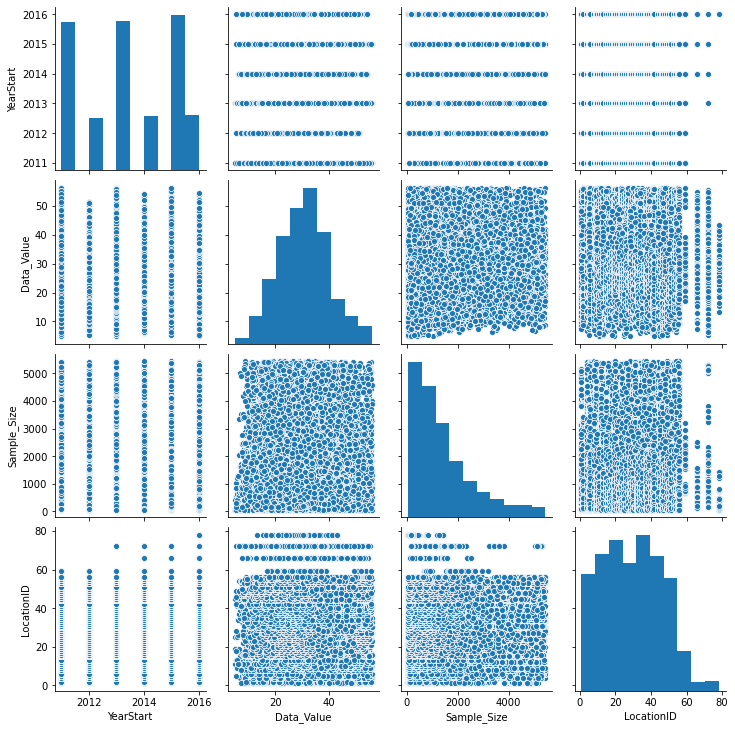

In [40]:
sns.pairplot(numerical)

In [44]:
corr = numerical.corr()
corr

,YearStart,Data_Value,Sample_Size,LocationID
YearStart,1.000000,0.004691,-0.042338,0.045668
Data_Value,0.004691,1.000000,-0.023107,0.000882
Sample_Size,-0.042338,-0.023107,1.000000,-0.001618
LocationID,0.045668,0.000882,-0.001618,1.000000


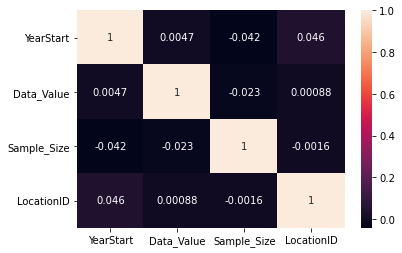

In [45]:
sns.heatmap(corr,annot=True)

In [50]:
x = numerical.drop(['LocationID'],axis=1)
y = numerical['LocationID']

In [51]:
print(x.shape)
print(y.shape)

(43666, 3)
(43666,)


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [59]:
x_scaler = StandardScaler().fit_transform(x_train)

In [61]:
x_scaler

array([[-0.76098075,  0.32623221,  0.22748774],
       [ 1.59636235,  0.06302896,  0.10716489],
       [ 1.59636235, -0.31598372, -0.6971851 ],
       ...,
       [-0.17164497,  0.78946993, -0.02222337],
       [-0.17164497, -0.55813071, -0.52988689],
       [-1.35031652, -0.17911803, -0.47549437]])

In [64]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred = model.predict(x_test)

In [66]:
model.coef_

array([ 4.46876683e-01,  1.53623821e-02, -4.20681349e-05])

In [67]:
model.intercept_

-870.4679298054676

In [74]:
r2score = metrics.mean_absolute_error(y_test,y_pred)

In [75]:
r2score

13.98542540351148